<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Feature Engineering

_Authors: Matt Brems (DC), Riley Dallas(AUS)_

---

## Review of Linear Regression
---

- Linear regression is a way for us to relate some dependent variable $Y$ to independent variables $X_1$,$\ldots$,$X_p$.
- We might write this out in one of the following two forms:
$$
\begin{eqnarray}
Y &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p +\varepsilon\\
\mathbf{Y} &=& \mathbf{X \beta + \varepsilon}
\end{eqnarray}
$$

<details><summary>
There are four assumptions to the simple linear regression model and five assumptions to the multiple linear regression model.
</summary>
1. **Linearity:** $Y$ is linearly related to $X_i$ for all $i$.<br>
2. **Independence:** Each residual $\varepsilon_i$ is independent of $\varepsilon_j$ for all $i\neq j$.<br>
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.<br>
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of $X_i$. (There should be no discernible relationship between $X_i$ and the residuals.)<br>
5. **Independence Part II:** $X_i$ is independent of $X_j$ for all $i\neq j$.
</details>

We can measure the performance of our model by using mean squared error (MSE).

## Feature Engineering
---

- If I use degrees Fahrenheit to predict how much a substance will expand or inches of rain to predict traffic accidents, people outside the United States may have a tougher time understanding my work.
- If I use straight line distance (as the crow flies) between two locations, my estimated time of arrival in a taxi or a Lyft is going to be pretty bad.
- If I put text into my model without some sort of preprocessing, my computer isn't going to understand how to handle it.

Suffice it to say: If your features (variables) aren't good, your predictions and inferences won't be good!

#### What is feature engineering?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

**Feature engineering** is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms.

Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

#### The Process of Data Science
1. Data Gathering
2. Data Cleaning/Munging
3. EDA
4. Modeling
5. Reporting

Feature engineering will straddle all five of these steps, but mostly focus on steps 2 and 3.

#### [The Process of Feature Engineering](https://www.youtube.com/watch?v=drUToKxEAUA)
1. Brainstorming or testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving features (if needed).
6. Return to step 1.
7. "Do data science!"

## Importing Libraries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. a `LinearRegression` mode from `sklearn`'s `linear_model` module
6. `StandardScaler` and `PolynomialFeatures` from `sklearn`'s `preprocessing` module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)

## Load the Data

---

Today's dataset (`Advertising.csv`) is from the [ISLR website](https://statlearning.com). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [2]:
df = pd.read_csv('../datasets/Advertising.csv')
df.drop(columns='Unnamed: 0', inplace=True)

## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our target; the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [3]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

## Linear Regression model
---

In the cell below, create a `LinearRegression` model.

In [4]:
lr = LinearRegression()

## Baseline score
---

In the cell below, use `cross_val_score` to get a baseline $R^2$ for our model.

In [5]:
# estimate of how well model will generalise to unseen fold , aka unseen data
# 


-cross_val_score(lr, X, y, cv=5,scoring = 'neg_mean_squared_error').mean()


# mean of MSE of 5 folds 

# what is the MSE in fold 1: ...
# what is the MSE in fold 2: ...
# how well the model is performing on the unseen fold, aka UNSEEN DATA

3.0729465971002092

## Interaction terms
---

Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

Interaction terms allow us to see what affect the **combination** of two features have on our label. For example, I'm not a fan of plain hot dogs, and I never eat mustard by itself. But I do enjoy hot dogs **with** mustard.

To create an interaction term, we simply do a pairwise multiplication of two columns:
```python
df['Interaction Col'] = df['Column 1'] * df['Column 2']
```

In the cell below, create an interaction column between `TV` and `radio`.

In [6]:
df['TV * radio'] = df['TV'] * df['radio']

## EDA: Create a heatmap
---

In the cell below, create a heatmap in `seaborn` to show how our `TV * radio` interaction term correlates to all the other columns.

<AxesSubplot:>

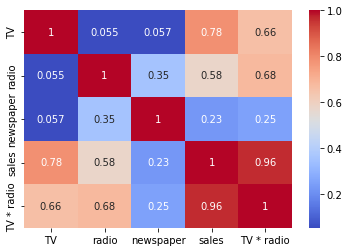

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## EDA: Pairplot
---

Now use `seaborn`'s `.pairplot()` method to create scatterplots with our new column.

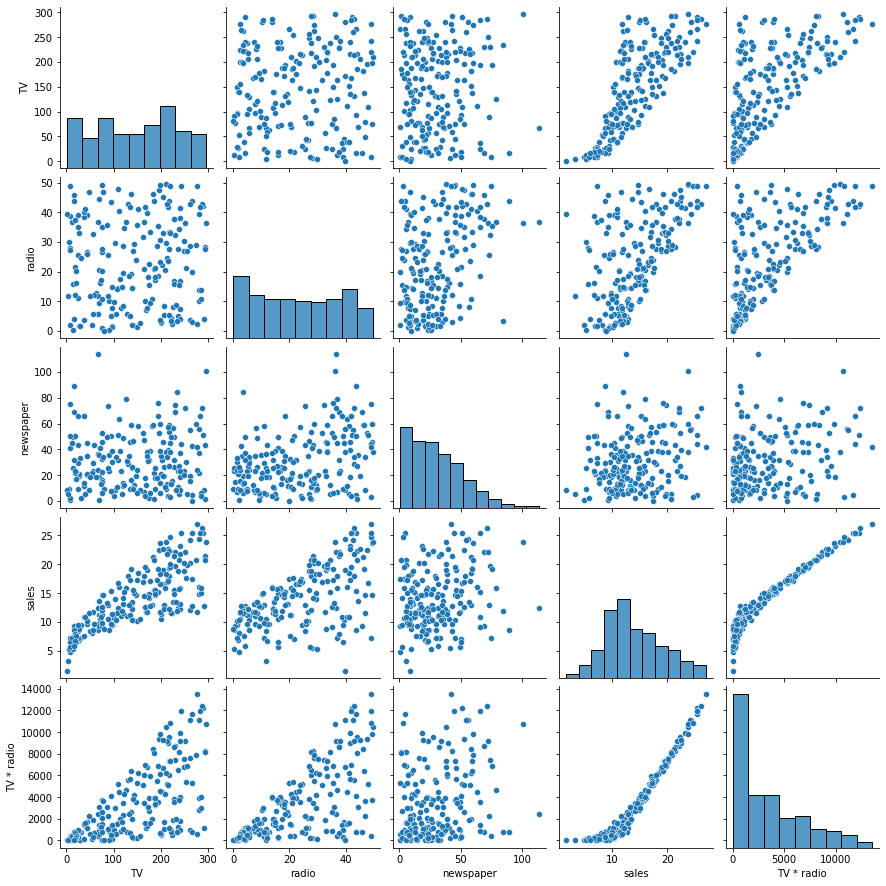

In [8]:
sns.pairplot(df)

## Create our features matrix (`X`) and target vector (`y`)
---

Our new column is highly correlated to our label, so let's incorporate it in our features matrix:
- `TV`
- `radio`
- `newspaper`
- `TV * radio` interaction term

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [9]:
features.append('TV * radio')
X = df[features]

# as a linear combination of other cols 
# x1 = 5*x2 + 6*x3

# model will have actual numerical solution

# 5 x b is a linear combination of a and b 
# a * b is not 

## Model evaluation
---

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [10]:
-cross_val_score(lr, X, y, cv=5,scoring = 'neg_mean_squared_error').mean()

0.9778898196046646

## `PolynomialFeatures`
---

Congrats! We struck gold on our first interaction term. The question now is how do we create interaction terms **en masse**? In our small dataset, we have three interaction terms:

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

With larger datasets, manually creating interaction terms would quickly become untenable. That's where `sklearn`'s `PolynomialFeatures` comes in. `PolynomialFeatures` will return 9 columns from our original features matrix:

1. The original `TV` column
2. The original `radio` column
3. The original `newspaper` column
4. `TV^2` (`TV` squared)
5. `radio^2` (`radio` squared)
6. `newspaper^2` (`newspaper` squared)
7. `TV radio` interaction
8. `TV newspaper` interaction
9. `radio newspaper` interaction

In the cells provided, use `PolynomialFeatures` to transform `X`. **NOTE**: You'll need to set `include_bias=False`.

In [11]:
features = ['TV', 'radio', 'newspaper']
X = df[features]

In [12]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
poly = PolynomialFeatures(include_bias=False, degree = 5)

In [26]:
X_poly = poly.fit_transform(X)

In [20]:
X_poly

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [16]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


## Model evaluation
---

Use `cross_val_score` to see how much `PolynomialFeatures` affects the $R^2$ score.

In [17]:
-cross_val_score(lr, X_poly, y, cv=5,scoring = 'neg_mean_squared_error').mean()

0.4376773759823019

In [21]:
# degree 3 

-cross_val_score(lr, X_poly, y, cv=5,scoring = 'neg_mean_squared_error').mean()

0.31404462866773974

In [24]:
# degree 4

-cross_val_score(lr, X_poly, y, cv=5,scoring = 'neg_mean_squared_error').mean()

0.2691097301130848

In [27]:
# degree 5

-cross_val_score(lr, X_poly, y, cv=5,scoring = 'neg_mean_squared_error').mean()

3.788532570224214

## Scaling
---

Throughout this course, we'll encounter several models that require you to scale your data prior to modeling. Imagine you were trying predict the price of a house, and you had two features: square footage and number of bedrooms. These two features are on different scales, separated by a few orders of magnitude (square footage is in the thousands and number of bedrooms is in the single digits). 

When we scale our data, we essentially convert our columns into Z-scores. 

### ${x- \mu \over \sigma}$

In the cell provided, scale the `TV` column.

In [36]:
((df['TV'] - df['TV'].mean()) / df['TV'].std(ddof=0)).head()

0    0.969852
1   -1.197376
2   -1.516155
3    0.052050
4    0.394182
Name: TV, dtype: float64

## `StandardScaler`
---

Rather than doing this manually for each column, `sklearn` has a `StandardScaler` class that allows us to scale our entire dataset in a few lines of code.

In [37]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
# althought linear regression doesnt care about scale 
# there are other models that care about scale 

ss = StandardScaler()
X_scaled =ss.fit_transform(X)
# ss.fit(X)
# X_scaled = ss.transform(X)
X_scaled[0, :]

# these are call we cakk transformers 
# they transofrm the underlying data 
# models also have .fit()
# models have a .predict()

# .fit() --> only see TRAIN DATA 
# 


array([0.96985227, 0.98152247, 1.77894547])

## Dummies
---

When we dummy a column, we're converting a categorical column into a one-hot encoded matrix. `pandas` allows us to do this with the `pd.get_dummies()` method.

In [39]:
fires = pd.read_csv('../datasets/forestfires.csv')
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [40]:
pd.get_dummies(fires[['day']])

,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0
